In [1]:
%matplotlib notebook

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.constants import c, m_e, e, epsilon_0, hbar

from tqdm.notebook import tqdm

from scipy.ndimage import gaussian_filter, gaussian_filter1d

#from qsa_pwfa.sim_new import Simulation 
from qsa_pwfa.new_methods.simulation import Simulation
from qsa_pwfa.utils import get_density, get_field, get_Psi_new_grid

n_plasma = 1e17 * 1e6
k_p_inv = (e**2 / m_e /  c**2  / epsilon_0 * n_plasma)**-0.5
field_dim = c**2 * m_e / e / k_p_inv

In [2]:
"""
CASE 1

nb/n0 = 5
kp*sigma_r = 0.1
kp_sigma_z = 1r_axis
Lambda = 0.05)

CASE 3

n_b = 0.1
R_b = 0.1
ksi0 = 5.
R_xi = 0.1

# plasma
L_xi = 18.
L_r = 10/2.5

"""



# Beam 
n_b = 16
R_b = 0.25
ksi0 = 5.
R_xi = 1

# plasma
L_xi = 18.
L_r = 10

# grid
N_xi = 4096
N_r = 2048

d_xi = L_xi / N_xi

dr = L_r / N_r

#d_xi = L_xi / N_xi
#dr = 0.03 * d_xi

#N_r = int(np.ceil(L_r/dr / 4)*4)
#L_r = N_r * dr
n_b * (2*np.pi)**1.5 * (k_p_inv*R_b)**2 * (k_p_inv*R_xi) * 1e23 * e * 1e12

1197.4784654024647

In [3]:
#sim = Simulation(L_xi=L_xi, N_xi=N_xi, L_r=L_r, N_r=N_r)
#sim.init_beam(n_b, R_b, ksi0, R_xi)

In [4]:
#plt.figure()

#plt.plot(sim.F)
#sim.advance_xi(iter_max=100, rel_err_max=1e-2, add_mag_force=True, mixing_factor=0.02)
#plt.plot(sim.F)

In [5]:
sim = Simulation(L_xi=L_xi, N_xi=N_xi, L_r=L_r, N_r=N_r, verbose=True)

sim.init_beam(n_b, R_b, ksi0, R_xi)

r_xi = np.zeros((sim.N_xi, sim.N_r))
vz_xi = np.zeros((sim.N_xi, sim.N_r))
phi_xi = np.zeros((sim.N_xi, sim.N_r))
dAr_dxi_xi = np.zeros((sim.N_xi, sim.N_r))
dAz_dr_xi = np.zeros((sim.N_xi, sim.N_r))
force_xi = np.zeros((sim.N_xi, sim.N_r))

r_xi[0] = sim.r
vz_xi[0] = sim.v_z

for i_xi in tqdm(range(N_xi-1)):
    sim.advance_xi(iter_max=10, rel_err_max=1e-2, add_mag_force=True, mixing_factor=0.05)
    r_xi[i_xi+1] = sim.r
    vz_xi[i_xi+1] = sim.v_z
    phi_xi[i_xi+1] = sim.Psi
    dAr_dxi_xi[i_xi+1] = sim.dAr_dxi
    dAz_dr_xi[i_xi+1] = sim.dAz_dr
    force_xi[i_xi+1] = sim.F

  0%|          | 0/4095 [00:00<?, ?it/s]

reached error 0.0202027 in 10 iterations
reached error 0.00962855 in 8 iterations
reached error 0.00988305 in 4 iterations
reached error 0.0079754 in 5 iterations
reached error 0.00809118 in 5 iterations
reached error 0.00827722 in 4 iterations
reached error 0.00867973 in 5 iterations
reached error 0.00928204 in 4 iterations
reached error 0.00968372 in 5 iterations
reached error 0.00839092 in 5 iterations
reached error 0.00896234 in 5 iterations
reached error 0.0097743 in 4 iterations
reached error 0.00812575 in 6 iterations
reached error 0.00869128 in 4 iterations
reached error 0.00928782 in 5 iterations
reached error 0.00801406 in 5 iterations
reached error 0.00867969 in 5 iterations
reached error 0.00943814 in 4 iterations
reached error 0.00994249 in 5 iterations
reached error 0.00871707 in 5 iterations
reached error 0.00929687 in 5 iterations
reached error 0.00803536 in 5 iterations
reached error 0.00869264 in 5 iterations
reached error 0.00947153 in 4 iterations
reached error 0.00

reached error 0.00842837 in 5 iterations
reached error 0.0088702 in 5 iterations
reached error 0.00783747 in 5 iterations
reached error 0.00834137 in 5 iterations
reached error 0.00931335 in 4 iterations
reached error 0.00965413 in 5 iterations
reached error 0.00867549 in 5 iterations
reached error 0.00907974 in 5 iterations
reached error 0.00806696 in 5 iterations
reached error 0.00853769 in 5 iterations
reached error 0.0095862 in 4 iterations
reached error 0.00988708 in 5 iterations
reached error 0.00893192 in 5 iterations
reached error 0.00929958 in 5 iterations
reached error 0.00830837 in 5 iterations
reached error 0.00874531 in 5 iterations
reached error 0.00987515 in 4 iterations
reached error 0.00805411 in 6 iterations
reached error 0.00896546 in 4 iterations
reached error 0.00934078 in 5 iterations
reached error 0.00836373 in 5 iterations
reached error 0.00879261 in 5 iterations
reached error 0.00995082 in 4 iterations
reached error 0.0081037 in 6 iterations
reached error 0.009

reached error 0.00957937 in 5 iterations
reached error 0.00888213 in 5 iterations
reached error 0.0090631 in 5 iterations
reached error 0.00833378 in 5 iterations
reached error 0.00857319 in 5 iterations
reached error 0.0099866 in 4 iterations
reached error 0.00797506 in 6 iterations
reached error 0.00919657 in 4 iterations
reached error 0.00934922 in 5 iterations
reached error 0.00864976 in 5 iterations
reached error 0.00885105 in 5 iterations
reached error 0.00812081 in 5 iterations
reached error 0.00837628 in 5 iterations
reached error 0.0097368 in 4 iterations
reached error 0.0098142 in 5 iterations
reached error 0.00915424 in 5 iterations
reached error 0.00928971 in 5 iterations
reached error 0.00859594 in 5 iterations
reached error 0.00879153 in 5 iterations
reached error 0.00806887 in 5 iterations
reached error 0.00832016 in 5 iterations
reached error 0.00967558 in 4 iterations
reached error 0.00975114 in 5 iterations
reached error 0.00909876 in 5 iterations
reached error 0.0092

reached error 0.0079581 in 5 iterations
reached error 0.00801376 in 5 iterations
reached error 0.00961705 in 4 iterations
reached error 0.009496 in 5 iterations
reached error 0.00911496 in 5 iterations
reached error 0.00904263 in 5 iterations
reached error 0.00863245 in 5 iterations
reached error 0.00860972 in 5 iterations
reached error 0.00817411 in 5 iterations
reached error 0.00819752 in 5 iterations
reached error 0.0098811 in 4 iterations
reached error 0.00972016 in 5 iterations
reached error 0.0093688 in 5 iterations
reached error 0.00925846 in 5 iterations
reached error 0.0088765 in 5 iterations
reached error 0.00881746 in 5 iterations
reached error 0.00840871 in 5 iterations
reached error 0.00839743 in 5 iterations
reached error 0.00796494 in 5 iterations
reached error 0.00799766 in 5 iterations
reached error 0.00963237 in 4 iterations
reached error 0.00948772 in 5 iterations
reached error 0.00913631 in 5 iterations
reached error 0.00903975 in 5 iterations
reached error 0.008659

reached error 0.00911029 in 5 iterations
reached error 0.00877231 in 5 iterations
reached error 0.00870414 in 5 iterations
reached error 0.00840615 in 5 iterations
reached error 0.00831677 in 5 iterations
reached error 0.00805569 in 5 iterations
reached error 0.00794721 in 5 iterations
reached error 0.00973753 in 4 iterations
reached error 0.0097521 in 5 iterations
reached error 0.0093322 in 5 iterations
reached error 0.00932063 in 5 iterations
reached error 0.00894579 in 5 iterations
reached error 0.00890988 in 5 iterations
reached error 0.0085761 in 5 iterations
reached error 0.00851812 in 5 iterations
reached error 0.00822221 in 5 iterations
reached error 0.00814429 in 5 iterations
reached error 0.00994212 in 4 iterations
reached error 0.0099936 in 5 iterations
reached error 0.00953305 in 5 iterations
reached error 0.00955714 in 5 iterations
reached error 0.0091427 in 5 iterations
reached error 0.00914138 in 5 iterations
reached error 0.00876907 in 5 iterations
reached error 0.00874

reached error 0.00906705 in 5 iterations
reached error 0.00945904 in 5 iterations
reached error 0.008795 in 5 iterations
reached error 0.00916808 in 5 iterations
reached error 0.00853173 in 5 iterations
reached error 0.00888732 in 5 iterations
reached error 0.00827704 in 5 iterations
reached error 0.00861644 in 5 iterations
reached error 0.00803065 in 5 iterations
reached error 0.00835508 in 5 iterations
reached error 0.00983724 in 4 iterations
reached error 0.00809824 in 6 iterations
reached error 0.00954525 in 4 iterations
reached error 0.00785142 in 6 iterations
reached error 0.00926235 in 4 iterations
reached error 0.00971091 in 5 iterations
reached error 0.00899538 in 5 iterations
reached error 0.0094229 in 5 iterations
reached error 0.00873469 in 5 iterations
reached error 0.00914414 in 5 iterations
reached error 0.00848204 in 5 iterations
reached error 0.00887477 in 5 iterations
reached error 0.00823733 in 5 iterations
reached error 0.00861458 in 5 iterations
reached error 0.008

reached error 0.0091693 in 4 iterations
reached error 0.00832559 in 6 iterations
reached error 0.00890616 in 4 iterations
reached error 0.00811681 in 6 iterations
reached error 0.00864545 in 4 iterations
reached error 0.00791164 in 6 iterations
reached error 0.0083866 in 4 iterations
reached error 0.00984147 in 5 iterations
reached error 0.0083215 in 5 iterations
reached error 0.00979068 in 5 iterations
reached error 0.00824686 in 5 iterations
reached error 0.00973757 in 5 iterations
reached error 0.00817293 in 5 iterations
reached error 0.00968791 in 5 iterations
reached error 0.00810223 in 5 iterations
reached error 0.00964378 in 5 iterations
reached error 0.00803555 in 5 iterations
reached error 0.00958578 in 5 iterations
reached error 0.00795604 in 5 iterations
reached error 0.00951678 in 5 iterations
reached error 0.00995457 in 4 iterations
reached error 0.00923345 in 6 iterations
reached error 0.00962326 in 4 iterations
reached error 0.00896257 in 6 iterations
reached error 0.009

reached error 0.00937639 in 5 iterations
reached error 0.00897401 in 5 iterations
reached error 0.00897371 in 5 iterations
reached error 0.00854847 in 5 iterations
reached error 0.00858819 in 5 iterations
reached error 0.00814452 in 5 iterations
reached error 0.00822285 in 5 iterations
reached error 0.00993497 in 4 iterations
reached error 0.00976421 in 5 iterations
reached error 0.00947621 in 5 iterations
reached error 0.00935516 in 5 iterations
reached error 0.00903884 in 5 iterations
reached error 0.00896352 in 5 iterations
reached error 0.00862178 in 5 iterations
reached error 0.00859022 in 5 iterations
reached error 0.00822839 in 5 iterations
reached error 0.00823466 in 5 iterations
reached error 0.00785241 in 5 iterations
reached error 0.00993632 in 4 iterations
reached error 0.00974557 in 5 iterations
reached error 0.00952519 in 5 iterations
reached error 0.00930312 in 5 iterations
reached error 0.00913396 in 5 iterations
reached error 0.00888625 in 5 iterations
reached error 0.

reached error 0.00894097 in 5 iterations
reached error 0.00922693 in 5 iterations
reached error 0.00864999 in 5 iterations
reached error 0.00890693 in 5 iterations
reached error 0.00836991 in 5 iterations
reached error 0.00859855 in 5 iterations
reached error 0.0080983 in 5 iterations
reached error 0.00830213 in 5 iterations
reached error 0.00987045 in 4 iterations
reached error 0.00803686 in 6 iterations
reached error 0.00957539 in 4 iterations
reached error 0.00994748 in 5 iterations
reached error 0.00926627 in 5 iterations
reached error 0.0096037 in 5 iterations
reached error 0.00896718 in 5 iterations
reached error 0.00927343 in 5 iterations
reached error 0.00867884 in 5 iterations
reached error 0.00895554 in 5 iterations
reached error 0.00839987 in 5 iterations
reached error 0.00864898 in 5 iterations
reached error 0.00813022 in 5 iterations
reached error 0.00835433 in 5 iterations
reached error 0.00991351 in 4 iterations
reached error 0.00808641 in 6 iterations
reached error 0.00

reached error 0.00819786 in 6 iterations
reached error 0.00965299 in 4 iterations
reached error 0.00793501 in 6 iterations
reached error 0.00936133 in 4 iterations
reached error 0.00982776 in 5 iterations
reached error 0.00908174 in 5 iterations
reached error 0.00951595 in 5 iterations
reached error 0.00881007 in 5 iterations
reached error 0.00921518 in 5 iterations
reached error 0.00854685 in 5 iterations
reached error 0.00892368 in 5 iterations
reached error 0.00829187 in 5 iterations
reached error 0.00864195 in 5 iterations
reached error 0.00804409 in 5 iterations
reached error 0.00837031 in 5 iterations
reached error 0.00984144 in 4 iterations
reached error 0.00810236 in 6 iterations
reached error 0.00954539 in 4 iterations
reached error 0.00784321 in 6 iterations
reached error 0.00925688 in 4 iterations
reached error 0.00971476 in 5 iterations
reached error 0.0089807 in 5 iterations
reached error 0.00940724 in 5 iterations
reached error 0.00871417 in 5 iterations
reached error 0.0

reached error 0.00805563 in 5 iterations
reached error 0.00838201 in 5 iterations
reached error 0.00989271 in 4 iterations
reached error 0.00812238 in 6 iterations
reached error 0.00959933 in 4 iterations
reached error 0.0078691 in 6 iterations
reached error 0.00931467 in 4 iterations
reached error 0.00974041 in 5 iterations
reached error 0.00905284 in 5 iterations
reached error 0.0094576 in 5 iterations
reached error 0.00880275 in 5 iterations
reached error 0.00918544 in 5 iterations
reached error 0.00855985 in 5 iterations
reached error 0.0089178 in 5 iterations
reached error 0.00832317 in 5 iterations
reached error 0.00866267 in 5 iterations
reached error 0.0080933 in 5 iterations
reached error 0.00841272 in 5 iterations
reached error 0.00994387 in 4 iterations
reached error 0.00815365 in 6 iterations
reached error 0.00965024 in 4 iterations
reached error 0.0079007 in 6 iterations
reached error 0.00936518 in 4 iterations
reached error 0.00977869 in 5 iterations
reached error 0.00910

reached error 0.00828103 in 5 iterations
reached error 0.00839262 in 5 iterations
reached error 0.00812167 in 5 iterations
reached error 0.00824208 in 5 iterations
reached error 0.00795224 in 5 iterations
reached error 0.0080908 in 5 iterations
reached error 0.0099766 in 4 iterations
reached error 0.00786874 in 6 iterations
reached error 0.009667 in 4 iterations
reached error 0.0097176 in 5 iterations
reached error 0.00947392 in 5 iterations
reached error 0.00955671 in 5 iterations
reached error 0.00929972 in 5 iterations
reached error 0.00939563 in 5 iterations
reached error 0.00912912 in 5 iterations
reached error 0.00923954 in 5 iterations
reached error 0.00895769 in 5 iterations
reached error 0.00908863 in 5 iterations
reached error 0.00879653 in 5 iterations
reached error 0.00893709 in 5 iterations
reached error 0.00863474 in 5 iterations
reached error 0.00879458 in 5 iterations
reached error 0.00848132 in 5 iterations
reached error 0.00866088 in 5 iterations
reached error 0.00833

reached error 0.00896082 in 4 iterations
reached error 0.0080189 in 6 iterations
reached error 0.00985709 in 3 iterations
reached error 0.00856838 in 6 iterations
reached error 0.00850055 in 4 iterations
reached error 0.00977937 in 5 iterations
reached error 0.00882352 in 4 iterations
reached error 0.00825627 in 6 iterations
reached error 0.00826395 in 4 iterations
reached error 0.00956372 in 5 iterations
reached error 0.00990691 in 4 iterations
reached error 0.00875885 in 6 iterations
reached error 0.008959 in 4 iterations
reached error 0.00802963 in 6 iterations
reached error 0.00812739 in 4 iterations
reached error 0.0092794 in 5 iterations
reached error 0.00994443 in 4 iterations
reached error 0.00856117 in 6 iterations
reached error 0.00919829 in 4 iterations
reached error 0.00990094 in 5 iterations
reached error 0.00885143 in 5 iterations
reached error 0.00928763 in 5 iterations
reached error 0.00852398 in 5 iterations
reached error 0.00905767 in 5 iterations
reached error 0.0096

reached error 0.00927909 in 6 iterations
reached error 0.00699682 in 4 iterations
reached error 0.008601 in 6 iterations
reached error 0.00908994 in 3 iterations
reached error 0.00932628 in 6 iterations
reached error 0.00986079 in 3 iterations
reached error 0.00792686 in 7 iterations
reached error 0.00791474 in 3 iterations
reached error 0.00817832 in 6 iterations
reached error 0.00812077 in 3 iterations
reached error 0.00856284 in 6 iterations
reached error 0.00849937 in 3 iterations
reached error 0.00889642 in 6 iterations
reached error 0.00881427 in 3 iterations
reached error 0.00928021 in 6 iterations
reached error 0.00910931 in 3 iterations
reached error 0.0097398 in 6 iterations
reached error 0.00967688 in 3 iterations
reached error 0.00831706 in 7 iterations
reached error 0.00774063 in 3 iterations
reached error 0.00861204 in 6 iterations
reached error 0.00803197 in 3 iterations
reached error 0.00866166 in 6 iterations
reached error 0.00805362 in 3 iterations
reached error 0.008

reached error 0.00985006 in 4 iterations
reached error 0.00995948 in 5 iterations
reached error 0.00951363 in 5 iterations
reached error 0.00962093 in 5 iterations
reached error 0.00920753 in 5 iterations
reached error 0.00928025 in 5 iterations
reached error 0.00890778 in 5 iterations
reached error 0.00897565 in 5 iterations
reached error 0.00863625 in 5 iterations
reached error 0.00866195 in 5 iterations
reached error 0.00834814 in 5 iterations
reached error 0.00836137 in 5 iterations
reached error 0.00809089 in 5 iterations
reached error 0.00807774 in 5 iterations
reached error 0.00974778 in 4 iterations
reached error 0.00983255 in 5 iterations
reached error 0.00942778 in 5 iterations
reached error 0.00949552 in 5 iterations
reached error 0.00912694 in 5 iterations
reached error 0.00916123 in 5 iterations
reached error 0.0088192 in 5 iterations
reached error 0.00883871 in 5 iterations
reached error 0.00852801 in 5 iterations
reached error 0.00851784 in 5 iterations
reached error 0.0

reached error 0.00888221 in 5 iterations
reached error 0.00833158 in 5 iterations
reached error 0.00857979 in 5 iterations
reached error 0.0080661 in 5 iterations
reached error 0.00829946 in 5 iterations
reached error 0.00969176 in 4 iterations
reached error 0.00802328 in 6 iterations
reached error 0.00938696 in 4 iterations
reached error 0.0097465 in 5 iterations
reached error 0.00910069 in 5 iterations
reached error 0.00942593 in 5 iterations
reached error 0.00880905 in 5 iterations
reached error 0.00911633 in 5 iterations
reached error 0.00852598 in 5 iterations
reached error 0.00881969 in 5 iterations
reached error 0.00824859 in 5 iterations
reached error 0.00853949 in 5 iterations
reached error 0.00987175 in 4 iterations
reached error 0.00825921 in 6 iterations
reached error 0.00953728 in 4 iterations
reached error 0.00797954 in 6 iterations
reached error 0.00920586 in 4 iterations
reached error 0.00969263 in 5 iterations
reached error 0.00891489 in 5 iterations
reached error 0.00

reached error 0.00846087 in 6 iterations
reached error 0.00906299 in 4 iterations
reached error 0.00812273 in 6 iterations
reached error 0.00901031 in 4 iterations
reached error 0.0098336 in 5 iterations
reached error 0.00855074 in 5 iterations
reached error 0.00941088 in 5 iterations
reached error 0.00840029 in 5 iterations
reached error 0.00910088 in 5 iterations
reached error 0.00811488 in 5 iterations
reached error 0.00846213 in 5 iterations
reached error 0.00995179 in 4 iterations
reached error 0.00827417 in 6 iterations
reached error 0.00812886 in 5 iterations
reached error 0.00835017 in 5 iterations
reached error 0.00815685 in 5 iterations
reached error 0.00995508 in 4 iterations
reached error 0.00828698 in 6 iterations
reached error 0.00973807 in 4 iterations
reached error 0.00818612 in 6 iterations
reached error 0.00902936 in 4 iterations
reached error 0.00802211 in 6 iterations
reached error 0.0084622 in 4 iterations
reached error 0.00971324 in 5 iterations
reached error 0.00

reached error 0.00723113 in 4 iterations
reached error 0.00965749 in 5 iterations
reached error 0.00838626 in 4 iterations
reached error 0.0089136 in 6 iterations
reached error 0.00764931 in 4 iterations
reached error 0.00987201 in 5 iterations
reached error 0.00909928 in 4 iterations
reached error 0.00893507 in 6 iterations
reached error 0.00836456 in 4 iterations
reached error 0.00799355 in 6 iterations
reached error 0.00793726 in 4 iterations
reached error 0.00897585 in 5 iterations
reached error 0.00945378 in 4 iterations
reached error 0.00863047 in 6 iterations
reached error 0.00914076 in 4 iterations
reached error 0.00844686 in 6 iterations
reached error 0.00847961 in 4 iterations
reached error 0.00804832 in 6 iterations
reached error 0.00847665 in 4 iterations
reached error 0.00816692 in 6 iterations
reached error 0.00823008 in 4 iterations
reached error 0.00985859 in 5 iterations
reached error 0.00788295 in 5 iterations
reached error 0.00970242 in 5 iterations
reached error 0.0

reached error 0.00944251 in 5 iterations
reached error 0.00895656 in 5 iterations
reached error 0.00906518 in 5 iterations
reached error 0.00866125 in 5 iterations
reached error 0.00865553 in 5 iterations
reached error 0.00827211 in 5 iterations
reached error 0.00820469 in 5 iterations
reached error 0.00994671 in 4 iterations
reached error 0.00795378 in 6 iterations
reached error 0.00972851 in 4 iterations
reached error 0.00981637 in 5 iterations
reached error 0.00951003 in 5 iterations
reached error 0.00945777 in 5 iterations
reached error 0.0091459 in 5 iterations
reached error 0.00905895 in 5 iterations
reached error 0.00882426 in 5 iterations
reached error 0.0086732 in 5 iterations
reached error 0.00860501 in 5 iterations
reached error 0.00844472 in 5 iterations
reached error 0.00832934 in 5 iterations
reached error 0.00803351 in 5 iterations
reached error 0.00959791 in 4 iterations
reached error 0.00987091 in 5 iterations
reached error 0.00924221 in 5 iterations
reached error 0.00

reached error 0.00865963 in 5 iterations
reached error 0.00810906 in 5 iterations
reached error 0.0083957 in 5 iterations
reached error 0.0098272 in 4 iterations
reached error 0.00817041 in 6 iterations
reached error 0.00956068 in 4 iterations
reached error 0.00792586 in 6 iterations
reached error 0.00932231 in 4 iterations
reached error 0.00977503 in 5 iterations
reached error 0.00906508 in 5 iterations
reached error 0.00948152 in 5 iterations
reached error 0.00872636 in 5 iterations
reached error 0.00914656 in 5 iterations
reached error 0.0084491 in 5 iterations
reached error 0.00884096 in 5 iterations
reached error 0.00818582 in 5 iterations
reached error 0.00853129 in 5 iterations
reached error 0.00984645 in 4 iterations
reached error 0.00824195 in 6 iterations
reached error 0.00955674 in 4 iterations
reached error 0.00799672 in 6 iterations
reached error 0.00928233 in 4 iterations
reached error 0.00986698 in 5 iterations
reached error 0.00901043 in 5 iterations
reached error 0.009

reached error 0.00730867 in 3 iterations
reached error 0.00827795 in 6 iterations
reached error 0.00811466 in 3 iterations
reached error 0.00943002 in 6 iterations
reached error 0.00942035 in 3 iterations
reached error 0.00966178 in 7 iterations
reached error 0.00871755 in 4 iterations
reached error 0.00885673 in 6 iterations
reached error 0.00810355 in 4 iterations
reached error 0.00892901 in 6 iterations
reached error 0.00964815 in 3 iterations
reached error 0.00989953 in 6 iterations
reached error 0.00842759 in 4 iterations
reached error 0.00959956 in 6 iterations
reached error 0.00952376 in 3 iterations
reached error 0.00837111 in 7 iterations
reached error 0.00779257 in 3 iterations
reached error 0.00819283 in 6 iterations
reached error 0.00702792 in 3 iterations
reached error 0.00962587 in 5 iterations
reached error 0.00874885 in 3 iterations
reached error 0.0256236 in 10 iterations
reached error 0.00985391 in 8 iterations
reached error 0.00846502 in 7 iterations
reached error 0.

/tmp/ipykernel_33071/3855800055.py:14: RuntimeWarning: invalid value encountered in true_divide
  val = np.nan_to_num(gaussian_filter(field_dens/dens, 0.5))


<IPython.core.display.Javascript object>


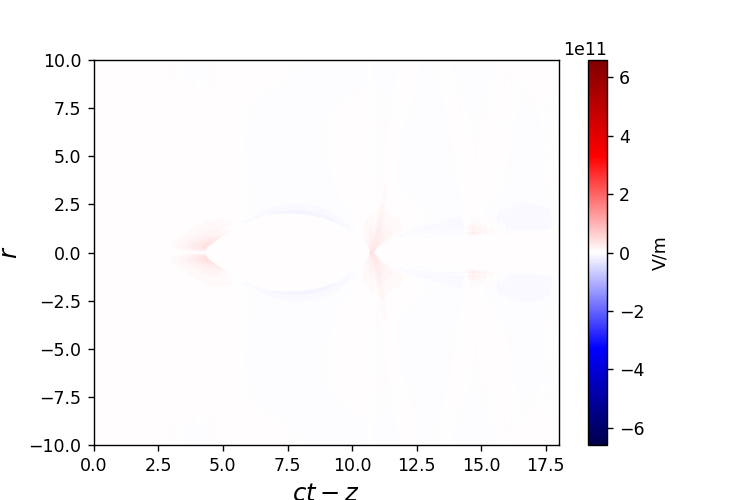

<IPython.core.display.Javascript object>


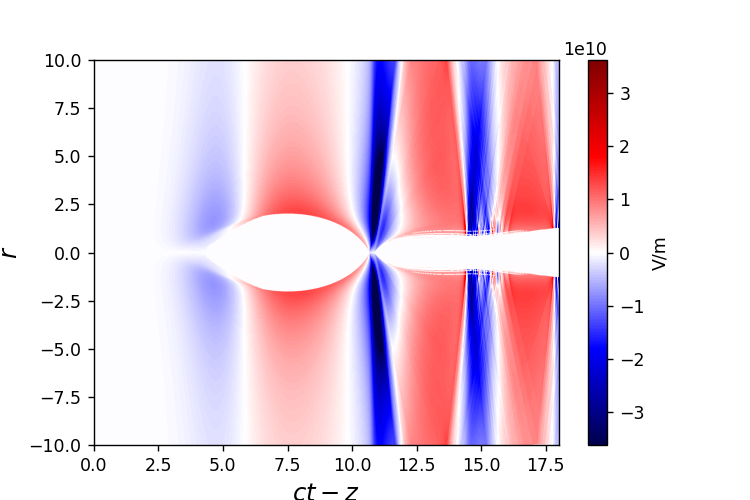

In [11]:
"""plt.figure()
plt.plot(sim.r0, force_xi[200], label = 'force')
plt.plot(sim.r0, force_diff[200], label = 'force_diff')
plt.legend()
#plt.savefig('diff_case.jpg')"""

Nr_new = sim.N_r//2
dr_proj = L_r/Nr_new
ext = np.array([0, sim.L_xi, -sim.L_r, sim.L_r ]) # * k_p_inv * 1e6

for field_val in [force_xi, dAr_dxi_xi * (1 - vz_xi)]:
    dens = get_density(r_xi, vz_xi, sim.dV, dr_proj, Nr_new)
    field_dens = get_field(field_val, r_xi, vz_xi, sim.dV, dr_proj, Nr_new)
    val = np.nan_to_num(gaussian_filter(field_dens/dens, 0.5))    
    val_ext = np.hstack((val[:,1:][:,::-1], val[:,1:]))
    
    plt.figure(figsize=(6,4))

    #vmax = np.abs( val.max() ) 
    vmax = np.abs( val.max() ) * field_dim   
    plt.imshow(val_ext.T*field_dim, origin='lower', 
               aspect='auto', cmap=plt.cm.seismic,
               vmax=vmax, vmin=-vmax,
               extent=ext)

    plt.colorbar(label='V/m')
    plt.xlabel(r'$ct-z$', fontsize=14)
    plt.ylabel(r'$r$', fontsize=14)


<IPython.core.display.Javascript object>


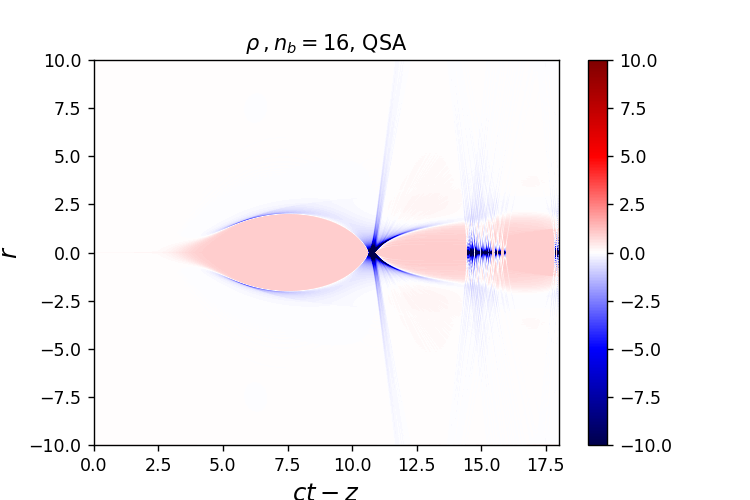

/tmp/ipykernel_33071/896023557.py:33: RuntimeWarning: invalid value encountered in true_divide
  val = np.nan_to_num(gaussian_filter(field_dens/dens, 0.5))


<IPython.core.display.Javascript object>


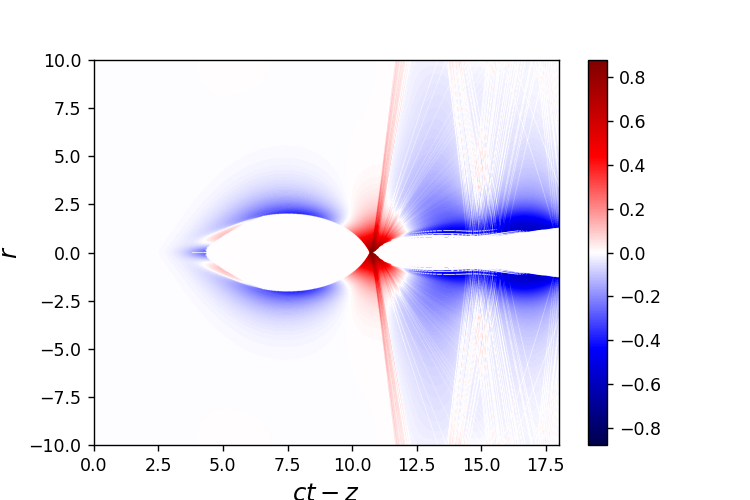

<IPython.core.display.Javascript object>


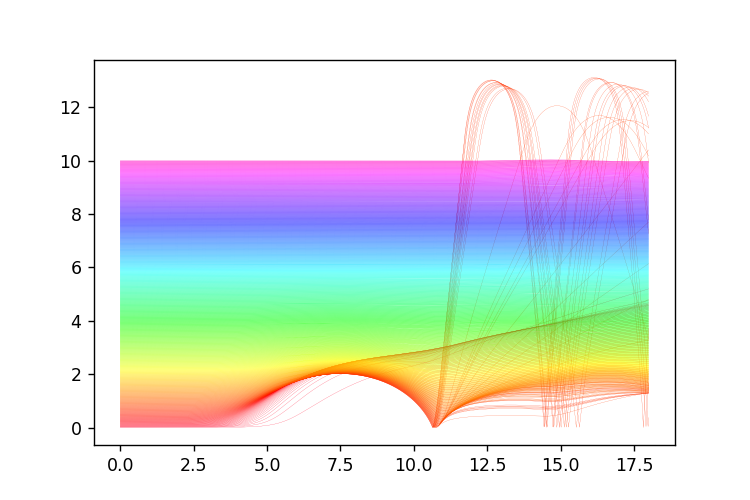

In [12]:
Nr_new = sim.N_r//2
dr_proj = L_r/Nr_new

dens = get_density(r_xi, vz_xi, sim.dV, dr_proj, Nr_new)
dens_ext = np.hstack((dens[:,1:][:,::-1], dens[:,1:]))

ext = np.array([0, sim.L_xi, -sim.L_r, sim.L_r ]) # * k_p_inv * 1e6

plt.figure(figsize=(6,4))

plt.imshow(-dens_ext.T+1,
           origin='lower',
           aspect='auto',
           cmap=plt.cm.seismic,
           vmax=10,
           vmin=-10,
           extent=ext
          )
plt.colorbar()
plt.xlabel(r'$ct-z$', fontsize=14)
plt.ylabel(r'$r$', fontsize=14)

plt.title(r'$\rho \: , n_b = $'+str(n_b)+', QSA')

plt.savefig('charge_Vika_qsa, '+'n_b = '+str(n_b)+'.jpg')

plt.show()


for field_val in [vz_xi, ]:
    dens = get_density(r_xi, vz_xi, sim.dV, dr_proj, Nr_new)
    field_dens = get_field(field_val, r_xi, vz_xi, sim.dV, dr_proj, Nr_new)
    val = np.nan_to_num(gaussian_filter(field_dens/dens, 0.5))    
    val_ext = np.hstack((val[:,1:][:,::-1], val[:,1:]))
    
    plt.figure(figsize=(6,4))

    vmax = np.abs( val.max() )    
    plt.imshow(val_ext.T, origin='lower', 
               aspect='auto', cmap=plt.cm.seismic,
               #vmax=4, 
               vmax=vmax, vmin=-vmax,
               extent=ext)

    plt.colorbar()
    plt.xlabel(r'$ct-z$', fontsize=14)
    plt.ylabel(r'$r$', fontsize=14)

#plt.savefig('QSA_PWFA_case2.pdf')
#plt.savefig('QSA_PWFA_case2.jpg')

plt.figure(figsize=(6,4))

Nr_plot =   sim.N_r

myrainbow = matplotlib.cm.get_cmap('gist_rainbow', Nr_plot)

for j in range(Nr_plot)[::2]:
    #plt.plot(r_xi[:N_xi][1:, j] - r_xi[:N_xi][-1, j], color=myrainbow(j/Nr_plot))
    plt.plot(sim.xi, r_xi[:, j], color=myrainbow(j/Nr_plot), lw=0.1)


#plt.savefig('QSA_PWFA_case1.pdf')
#plt.savefig('QSA_PWFA_case1.jpg')

In [13]:
Phi_new = np.zeros_like(r_xi)
dphi_dxi=np.zeros_like(r_xi)
dphi_dr=np.zeros_like(r_xi)

for i_xi in tqdm(range(N_xi-1)):
    Phi_new[i_xi,:] = get_Psi_new_grid(Phi_new[i_xi,:], sim.r0, r_xi[i_xi],  sim.r0, sim.dV)

for j in tqdm(range(N_r)):
    dphi_dxi[1:-1, j] = 0.5 *( Phi_new[2:, j]-Phi_new[:-2, j]) / d_xi

for i in tqdm(range(N_xi-1)):
    dphi_dr[i, 1:-1] = 0.5 *( Phi_new[i, 2:]-Phi_new[i, :-2]) / dr

  0%|          | 0/4095 [00:00<?, ?it/s]

  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 0/4095 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


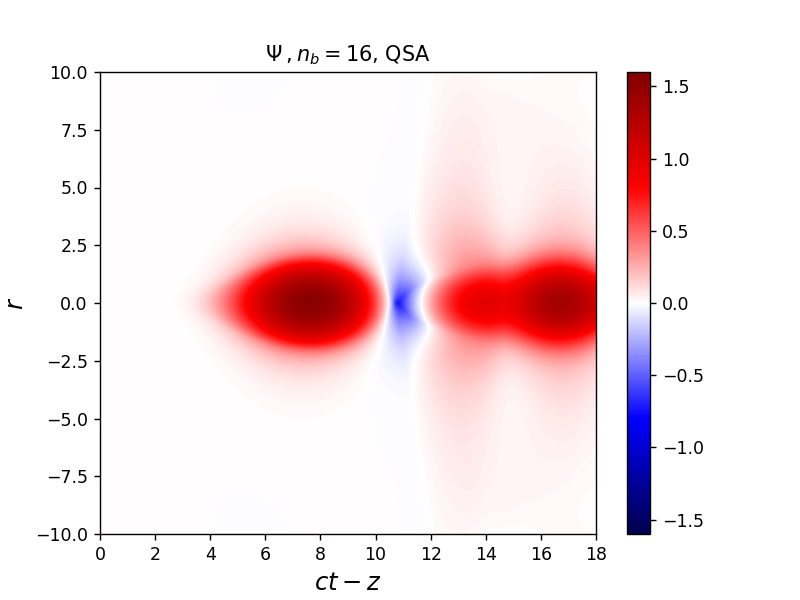

<IPython.core.display.Javascript object>


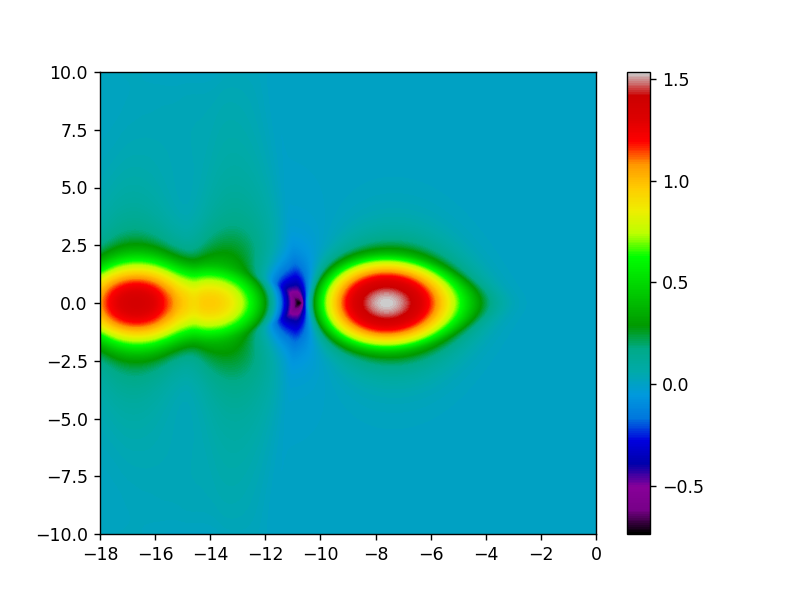

"\nplt.figure()\nvmax = np.max(np.abs(dphi_dxi))*field_dim\n\nEz_ext = np.hstack((dphi_dxi[:,1:][:,::-1], dphi_dxi[:,1:]))\n\nplt.imshow((Ez_ext.T*field_dim), origin='lower', \n           cmap='seismic', extent=ext, vmin=-vmax, vmax=vmax,\n           aspect='auto')\n\nplt.ylabel(r'$r$', fontsize=14)\nplt.xlabel(r'$ct-z$', fontsize=14)\n\nplt.colorbar(label='V/m')\n\nplt.figure()\nvmax = np.max(np.abs(dphi_dr))*field_dim\n\ndphi_dr_ext = np.hstack((-dphi_dr[:,1:][:,::-1], dphi_dr[:,1:]))\n\nplt.imshow(-dphi_dr_ext.T*field_dim, origin='lower', cmap='seismic',\n           vmax=vmax, vmin=-vmax, extent=ext, aspect='auto')\nplt.ylabel(r'$r$', fontsize=14)\nplt.xlabel(r'$ct-z$', fontsize=14)\n\nplt.colorbar(label='V/m')\n"

In [14]:
# psi 0.13926 case1
# psi vmax=0.000588257, vmin=-0.000588257 case 3

plt.figure()
plt.imshow(Phi_new.T, origin='lower', aspect='auto')

#vmax = np.max(np.abs(Phi_new))
psi_ext = np.hstack((Phi_new[:,1:][:,::-1], Phi_new[:,1:]))

plt.imshow((psi_ext.T), origin='lower', 
           cmap='seismic', extent=ext, vmax=1.6, vmin=-1.6,
           aspect='auto')

plt.ylabel(r'$r$', fontsize=14)
plt.xlabel(r'$ct-z$', fontsize=14)
plt.title(r'$\Psi \: , n_b = $'+str(n_b)+', QSA')
plt.colorbar()

plt.savefig('psi_Vika_qsa, '+'n_b = '+str(n_b)+'.jpg')

plt.show()

#############################
plt.figure()

val_ext = np.hstack((Phi_new[:,1:][:,::-1], Phi_new[:,1:]))
ext = np.array([-sim.L_xi, 0, -sim.L_r, sim.L_r ]) # * k_p_inv * 1e6

plt.imshow( val_ext[::-1].T, origin='lower', 
            cmap=plt.cm.nipy_spectral, 
            #vmin = -0.03, vmax=0.03,
            extent=ext, 
            aspect='auto')

#plt.ylabel(r'$r$', fontsize=14)
#plt.xlabel(r'$ct-z$', fontsize=14)

#plt.xlim(-17,0)
plt.colorbar()

plt.show()


'''
plt.figure()
vmax = np.max(np.abs(dphi_dxi))*field_dim

Ez_ext = np.hstack((dphi_dxi[:,1:][:,::-1], dphi_dxi[:,1:]))

plt.imshow((Ez_ext.T*field_dim), origin='lower', 
           cmap='seismic', extent=ext, vmin=-vmax, vmax=vmax,
           aspect='auto')

plt.ylabel(r'$r$', fontsize=14)
plt.xlabel(r'$ct-z$', fontsize=14)

plt.colorbar(label='V/m')

plt.figure()
vmax = np.max(np.abs(dphi_dr))*field_dim

dphi_dr_ext = np.hstack((-dphi_dr[:,1:][:,::-1], dphi_dr[:,1:]))

plt.imshow(-dphi_dr_ext.T*field_dim, origin='lower', cmap='seismic',
           vmax=vmax, vmin=-vmax, extent=ext, aspect='auto')
plt.ylabel(r'$r$', fontsize=14)
plt.xlabel(r'$ct-z$', fontsize=14)

plt.colorbar(label='V/m')
'''

<IPython.core.display.Javascript object>


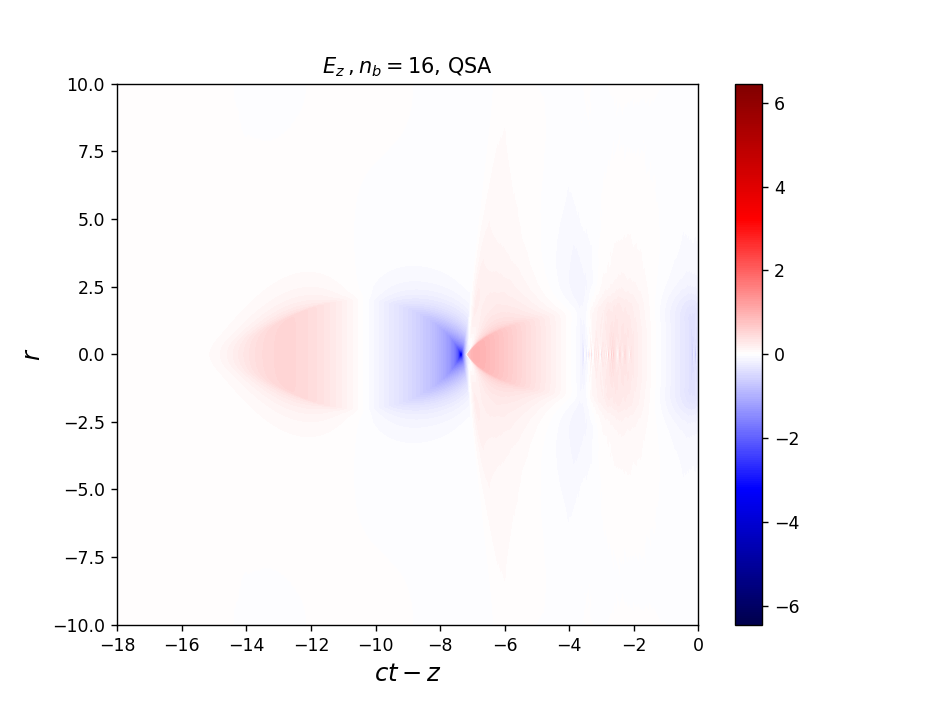

<IPython.core.display.Javascript object>


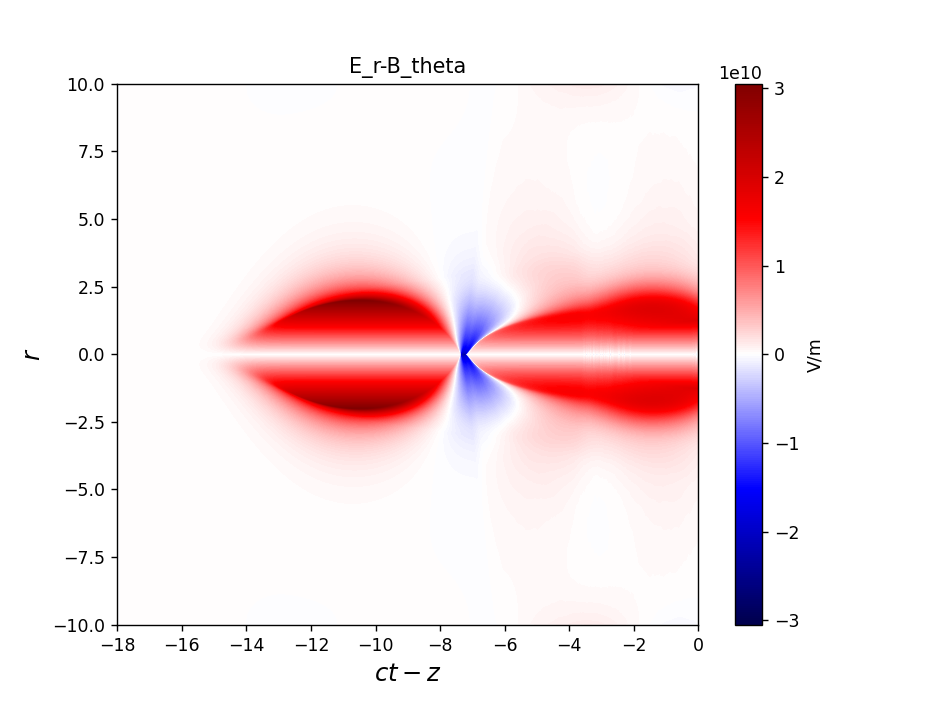

In [15]:
# E_z 0.43 case 1
# E_z 0.000587646864 case 3
plt.figure(figsize=(6,4.5))
vmax = 0.1*np.max(np.abs(dphi_dxi))#*field_dim

Ez_ext = np.hstack((dphi_dxi[:,1:][:,::-1], dphi_dxi[:,1:]))

plt.imshow((Ez_ext.T), origin='lower', 
           cmap='seismic', extent=ext, 
           vmax=6.45,
           vmin=-6.45, 
           aspect='auto')
plt.title(r'$E_z \: , n_b = $'+str(n_b)+', QSA')

plt.ylabel(r'$r$', fontsize=14)
plt.xlabel(r'$ct-z$', fontsize=14)

plt.colorbar()

plt.savefig('E_z_qsa'+str(n_b)+'.jpg')

plt.figure(figsize=(6,4.5))
vmax = np.max(np.abs(dphi_dr))*field_dim

dphi_dr_ext = np.hstack((dphi_dr[:,1:][:,::-1], dphi_dr[:,1:]))

plt.imshow(-dphi_dr_ext.T*field_dim, origin='lower', cmap='seismic',
           vmax=vmax, vmin=-vmax, extent=ext, aspect='auto')
plt.title('E_r-B_theta')
plt.ylabel(r'$r$', fontsize=14)
plt.xlabel(r'$ct-z$', fontsize=14)

plt.colorbar(label='V/m')

plt.savefig('E_r-B_theta.jpg')

In [17]:
E_r=-dphi_dr-dAz_dr_xi-dAr_dxi_xi
B_theta=E_r+dphi_dr

<IPython.core.display.Javascript object>


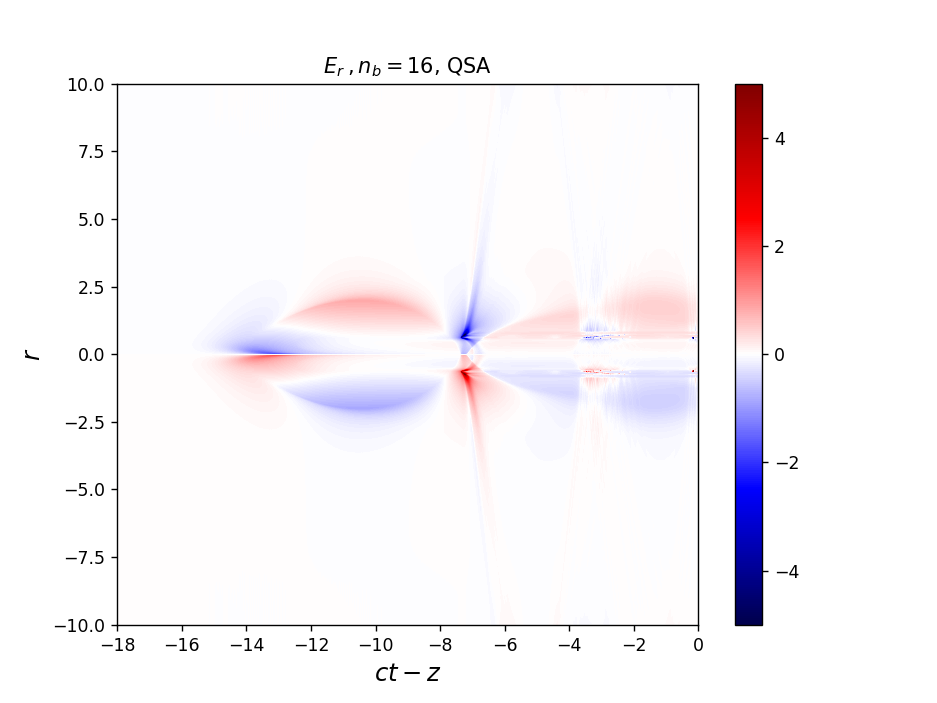

<IPython.core.display.Javascript object>


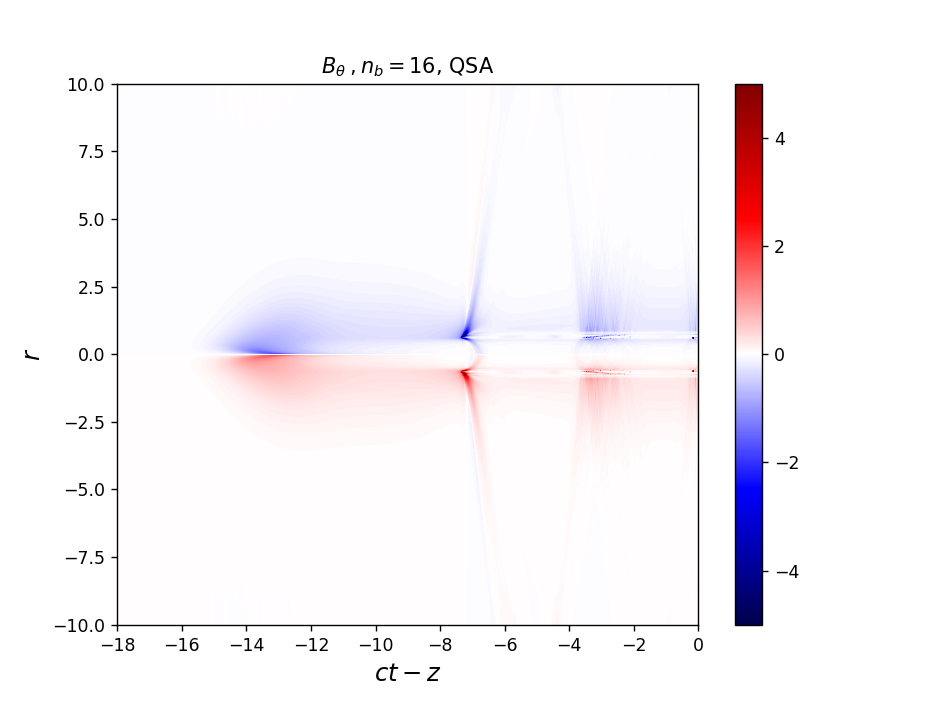

In [18]:
# E_r 0.63 B_theta 0.22 case 1 
# E_r .000854858765 B_theta 0.0008646468 case 1

plt.figure(figsize=(6,4.5))

Er_ext = np.hstack((-E_r[:,1:][:,::-1], E_r[:,1:]))

plt.imshow((Er_ext.T), origin='lower', 
           cmap='seismic', extent=ext, 
           vmax=5,
           vmin=-5, 
           aspect='auto')
plt.title(r'$E_r \: , n_b = $'+str(n_b)+', QSA')

plt.ylabel(r'$r$', fontsize=14)
plt.xlabel(r'$ct-z$', fontsize=14)

plt.colorbar()

plt.savefig('E_r.jpg')

plt.figure(figsize=(6,4.5))

B_theta_ext = np.hstack((-B_theta[:,1:][:,::-1], B_theta[:,1:]))

plt.imshow((B_theta_ext.T), origin='lower', 
           cmap='seismic', extent=ext, 
           vmax=5,
           vmin=-5, 
           aspect='auto')
plt.title(r'$B_\theta \: , n_b = $'+str(n_b)+', QSA')

plt.ylabel(r'$r$', fontsize=14)
plt.xlabel(r'$ct-z$', fontsize=14)

plt.colorbar()

plt.savefig('B_theta.jpg')


In [53]:
E_z_linear=np.loadtxt('E_z_Vm.txt', delimiter=",")
E_r_linear=np.loadtxt('E_r_Vm.txt', delimiter=",")
B_theta_linear=np.loadtxt('B_theta_T.txt', delimiter=",")

<IPython.core.display.Javascript object>


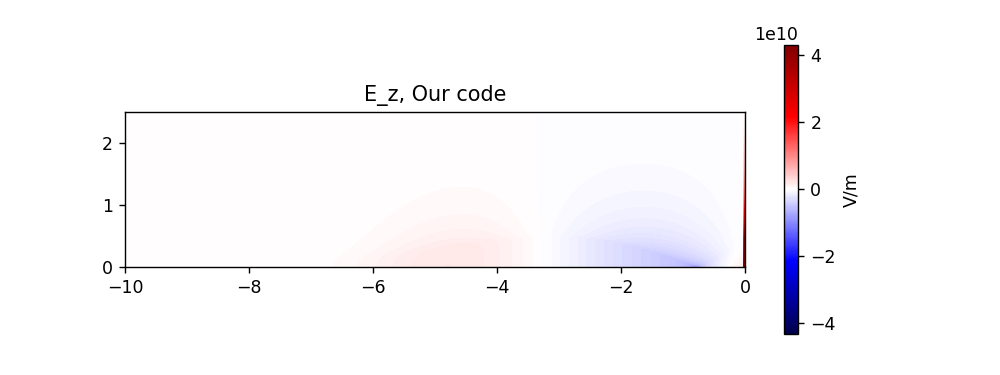

<IPython.core.display.Javascript object>


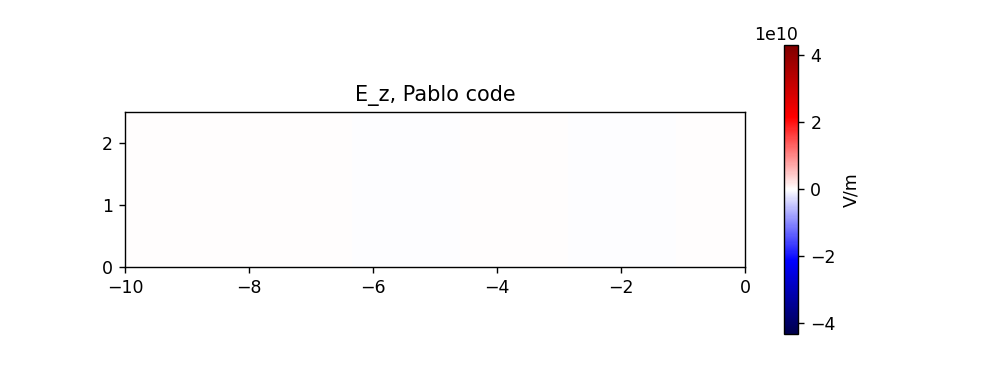

In [64]:
plt.figure(figsize=(8,3))
vmax = 0.4*np.max(np.abs(dphi_dxi))*field_dim
ext1 = np.array([-sim.L_xi, 0, 0, sim.L_r ]) # * k_p_inv * 1e6
plt.imshow(dphi_dxi.T*field_dim, origin='lower', cmap='seismic', extent=ext1, vmax=vmax, vmin=-vmax)
plt.title('E_z, Our code')
plt.colorbar(label='V/m')
plt.savefig('E_z, Our code.jpg')


plt.figure(figsize=(8,3))
plt.imshow(E_z_linear, origin='lower', cmap='seismic', extent=ext1, vmax=vmax, vmin=-vmax)
plt.title('E_z, Pablo code')
plt.colorbar(label='V/m')
plt.savefig('E_z, Pablo code.jpg')

<IPython.core.display.Javascript object>


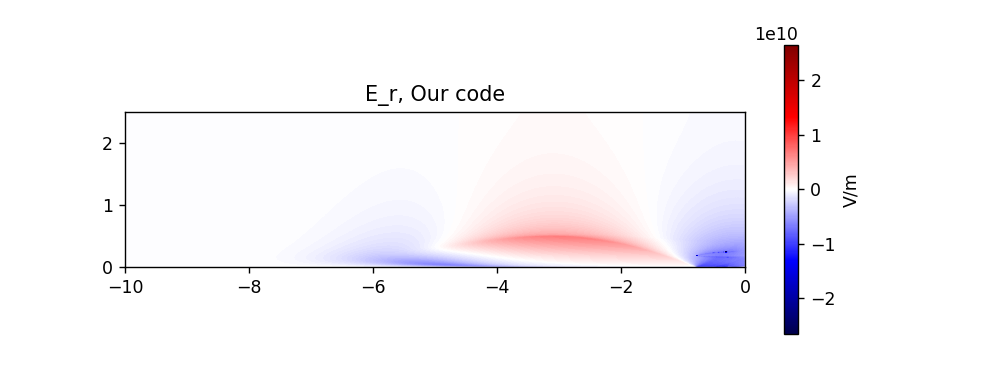

<IPython.core.display.Javascript object>


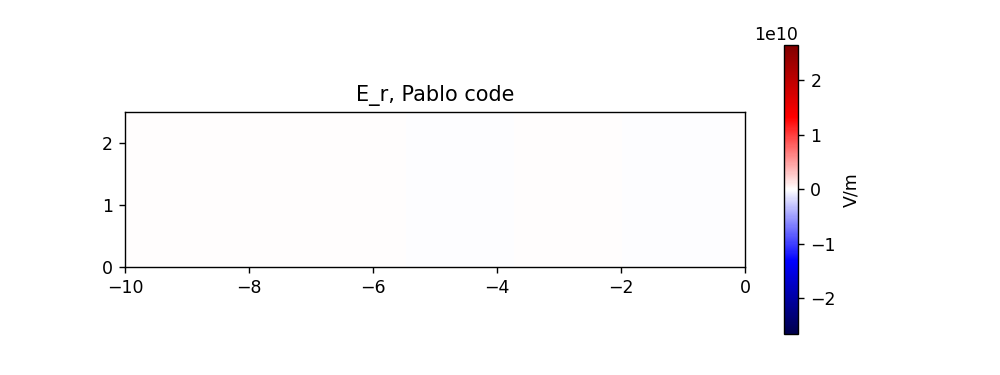

In [66]:
plt.figure(figsize=(8,3))
vmax = 0.1*np.max(np.abs(E_r))*field_dim
plt.imshow(E_r.T*field_dim, origin='lower', cmap='seismic', extent=ext1, vmax=vmax, vmin=-vmax)
plt.title('E_r, Our code')
plt.colorbar(label='V/m')
plt.savefig('E_r, Our code.jpg')


plt.figure(figsize=(8,3))
plt.imshow(-E_r_linear, origin='lower', cmap='seismic', extent=ext1, vmax=vmax, vmin=-vmax)
plt.title('E_r, Pablo code')
plt.colorbar(label='V/m')
plt.savefig('E_r, Pablo code.jpg')

<IPython.core.display.Javascript object>


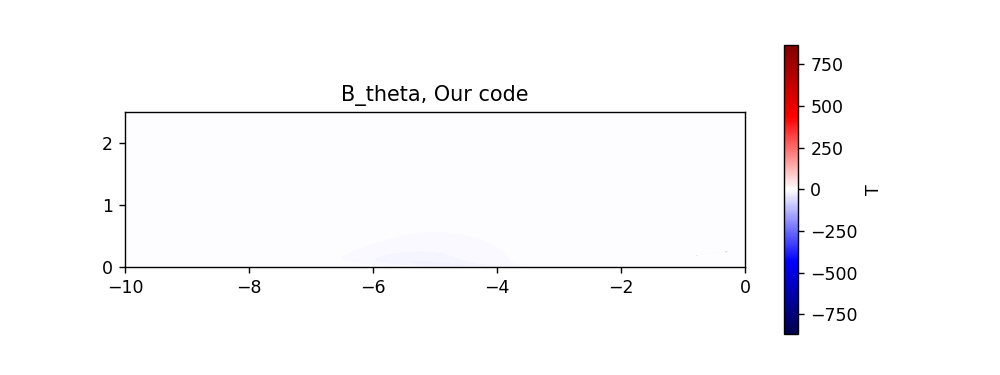

<IPython.core.display.Javascript object>


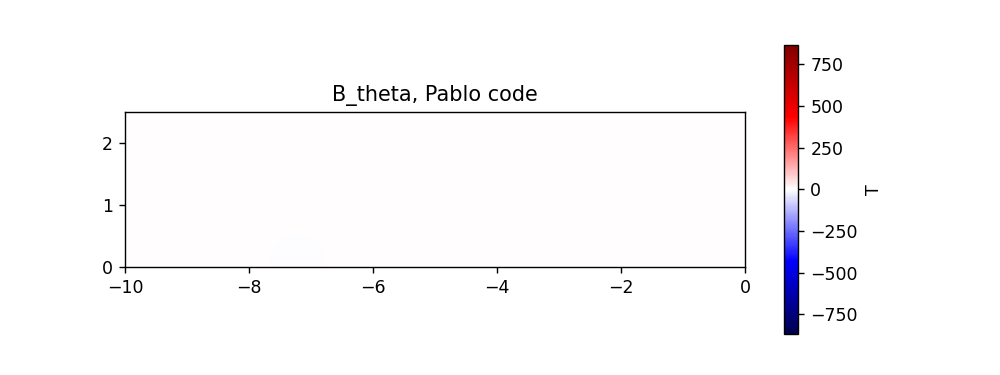

In [57]:
plt.figure(figsize=(8,3))
vmax = np.max(np.abs(B_theta/3/1e8))*field_dim
plt.imshow(B_theta.T*field_dim/3/1e8, origin='lower', cmap='seismic', extent=ext1, vmax=vmax, vmin=-vmax)
plt.title('B_theta, Our code')
plt.colorbar(label='T')
plt.savefig('B_theta, Our code.jpg')

plt.figure(figsize=(8,3))
#vmax = 0.4*np.max(np.abs(dphi_dxi))*field_dim
plt.imshow(B_theta_linear, origin='lower', cmap='seismic', extent=ext1, vmax=vmax, vmin=-vmax)
#plt.title('Our code')
plt.title('B_theta, Pablo code')
plt.colorbar(label='T')
plt.savefig('B_theta, Pablo code.jpg')